<a href="https://colab.research.google.com/github/tina-m-dev/pcos/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos/data

*   For every Yes/No questions: Yes = 1; No = 0
*   Blood Group indications:
A+ = 11
A- = 12
B+ = 13
B- = 14
O+ =15
O- = 16
AB+ =17
AB- = 18
* Blood pressure entered as systolic and diastolic separately
* RBS means Random glucose test
* Beta-HCG cases are mentioned as Case I and II.

In [72]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True
print(pd. __version__)

2.0.3


In [73]:
pcos_url='https://raw.githubusercontent.com/tina-m-dev/pcos/main/pcos_data/pcos.xlsx'
df_pcos=pd.read_excel(pcos_url)
df_pcos.columns = df_pcos.columns.str.strip()
df_pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


The criteria used to determine whether a patient has PCOS or not are not provided in this dataset, so I have excluded this column from further analysis. I have dropped the Height and Weight columns since BMI is already calculated and is more relevant. It is unclear what the difference is between the Beta-HCG cases I and II, so both I beta-HCG(mIU/mL) and II beta-HCG(mIU/mL) columns have been discarded. I have also removed the Hip(inch) and Waist(inch) columns as the ratio between these two measurements is calculated and more relevant. The meaning of the Cycle(R/I) column is unclear, so it has been dropped. Marital Status (Yrs) does not seem relevant to the topic and has been excluded. The Fast food (Y/N) and Reg.Exercise(Y/N) columns have been dropped as these measures are rather subjective than objective.

In [74]:
df_pcos.drop(['PCOS (Y/N)','Weight (Kg)', 'Height(Cm)','I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)','Hip(inch)', 'Waist(inch)','Cycle(R/I)','Marraige Status (Yrs)','Fast food (Y/N)', 'Reg.Exercise(Y/N)'], axis=1, inplace=True)

I'm excluding pregnant patients from further research as blood parameters can be significantly changed during pregnancy.

In [75]:
rows_to_drop = df_pcos[df_pcos['Pregnant(Y/N)'] == 1].index
df_pcos.drop(rows_to_drop, inplace=True)
df_pcos.drop('Pregnant(Y/N)', axis=1, inplace=True)
df_pcos.head()

,Sl. No,Patient File No.,Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,28,19.304017,15,78,22,10.48,5,0,7.95,3.68,2.160326,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,110,80,3,3,18.0,18.0,8.5
3,4,4,37,29.674945,13,72,20,12.00,5,0,8.06,2.36,3.415254,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,120,70,2,2,15.0,14.0,7.5
6,7,7,34,26.298488,11,72,18,10.90,5,0,2.85,0.31,9.193548,0.846154,1.51,3.05,26.41,42.7,0.46,93.0,0,0,0,0,0,120,80,6,6,15.0,16.0,6.8
8,9,9,32,16.023073,11,72,18,11.80,5,1,3.76,3.02,1.245033,0.897436,1.51,1.00,19.00,21.8,0.30,116.0,0,0,0,0,0,120,80,5,7,17.0,17.0,4.2
9,10,10,36,23.111111,15,80,20,10.00,2,0,2.80,1.51,1.854305,0.950000,6.65,1.61,11.74,27.7,0.25,125.0,0,0,0,0,0,110,80,1,1,14.0,17.0,2.5


Let's see how many patients are older than 41.

In [76]:
len(df_pcos.loc[df_pcos['Age (yrs)']>41])

14

Older patients will not be excluded. AMH values should be correlated with age, so these records could be significant.

In [77]:
df_pcos.dtypes

Sl. No                    int64
Patient File No.          int64
Age (yrs)                 int64
BMI                     float64
Blood Group               int64
Pulse rate(bpm)           int64
RR (breaths/min)          int64
Hb(g/dl)                float64
Cycle length(days)        int64
No. of aborptions         int64
FSH(mIU/mL)             float64
LH(mIU/mL)              float64
FSH/LH                  float64
Waist:Hip Ratio         float64
TSH (mIU/L)             float64
AMH(ng/mL)              float64
PRL(ng/mL)              float64
Vit D3 (ng/mL)          float64
PRG(ng/mL)              float64
RBS(mg/dl)              float64
Weight gain(Y/N)          int64
hair growth(Y/N)          int64
Skin darkening (Y/N)      int64
Hair loss(Y/N)            int64
Pimples(Y/N)              int64
BP _Systolic (mmHg)       int64
BP _Diastolic (mmHg)      int64
Follicle No. (L)          int64
Follicle No. (R)          int64
Avg. F size (L) (mm)    float64
Avg. F size (R) (mm)    float64
Endometr

Excluding all null values from the dataframe. These values will be estimated later in the analysis.

In [78]:
df_pcos[df_pcos.isnull().any(axis=1)]

,Sl. No,Patient File No.,Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
305,306,306,37,24.238227,13,74,20,11.7,5,0,2.91,0.35,8.314286,0.942857,16.0,NaN,2.22,38.6,0.3,100.0,0,0,0,0,1,120,70,4,5,17.0,16.0,5.6


In [79]:
missing_index = df_pcos['AMH(ng/mL)'].isnull()
df_pcos.loc[missing_index, 'AMH(ng/mL)']

305   NaN
Name: AMH(ng/mL), dtype: float64

In [80]:
df_pcos.drop(index=305, inplace=True)

Let's analyze outliers.

In [81]:
columns_categorical=['Blood Group','Weight gain(Y/N)','hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)','Pimples(Y/N)']

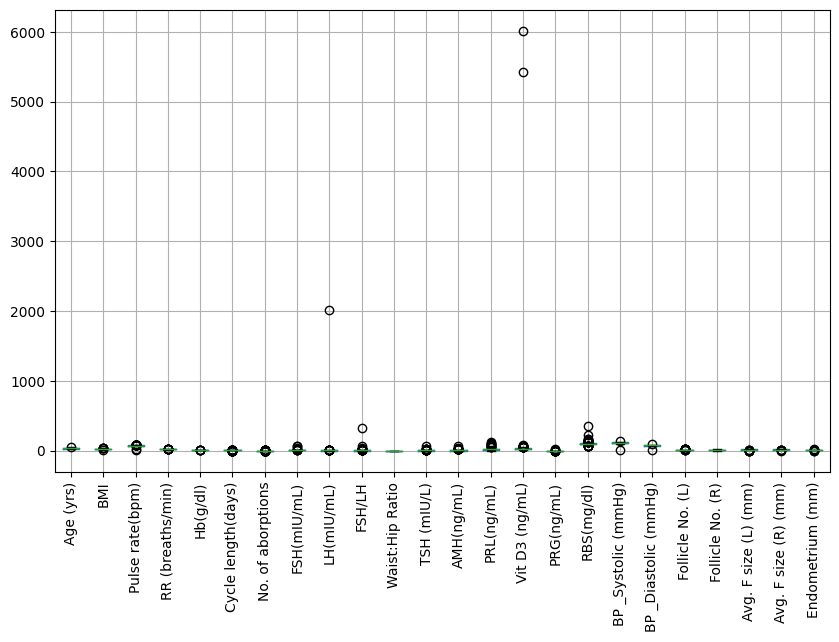

In [82]:
import matplotlib.pyplot as plt
df_pcos.loc[:, ~df_pcos.columns.isin(columns_categorical+['Sl. No', 'Patient File No.'])].boxplot(figsize=(10,6), rot=90)
plt.show()

LH seems to have an outlier and the row with the outlier will be excluded as it appears to be a mistakenly noted value.

In [83]:
df_pcos.sort_values(by=['LH(mIU/mL)'], ascending=False).head()

,Sl. No,Patient File No.,Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
455,456,456,32,23.111111,13,70,18,9.4,5,0,4.33,2018.00,0.002146,0.888889,2.10,7.70,40.47,41.04,0.25,93.0,0,0,0,0,1,110,80,6,7,18.0,18.0,9.0
120,121,121,30,24.919900,15,76,20,10.5,9,0,7.78,14.69,0.529612,0.825000,2.90,3.30,24.15,56.30,0.44,100.0,0,0,0,0,0,110,70,3,2,16.0,14.0,8.6
153,154,154,29,24.064047,11,74,18,11.5,4,0,6.65,12.95,0.513514,0.875000,1.89,6.86,27.58,21.22,0.44,116.0,1,0,0,1,0,110,80,3,5,16.0,19.0,8.0
131,132,132,25,21.122582,11,72,18,10.5,5,0,6.54,10.75,0.608372,0.833333,1.29,19.30,17.68,36.80,0.45,100.0,0,0,0,0,1,110,70,3,7,15.0,14.0,11.5
499,500,500,28,24.464602,14,74,20,10.8,5,0,6.50,10.50,0.619048,0.968750,1.83,11.20,34.16,33.00,0.30,100.0,0,0,0,0,0,120,80,8,7,18.0,20.0,8.8


In [84]:
df_pcos['z_score_LH']=(df_pcos['LH(mIU/mL)'] - df_pcos['LH(mIU/mL)'].mean())/df_pcos['LH(mIU/mL)'].std()
df_pcos.loc[df_pcos['z_score_LH']>3]

,Sl. No,Patient File No.,Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),z_score_LH
455,456,456,32,23.111111,13,70,18,9.4,5,0,4.33,2018.0,0.002146,0.888889,2.1,7.7,40.47,41.04,0.25,93.0,0,0,0,0,1,110,80,6,7,18.0,18.0,9.0,18.216852


In [85]:
df_pcos.drop(index=df_pcos.loc[df_pcos['z_score_LH']>3].index, inplace=True)

Vit D3 also seems to have outliers. However, this parameter is not likely to be significant for analyzing AMH values, so the patient records won't be excluded.

In [86]:
df_pcos['z_score_D3']=(df_pcos['Vit D3 (ng/mL)'] - df_pcos['Vit D3 (ng/mL)'].mean())/df_pcos['Vit D3 (ng/mL)'].std()
df_pcos.loc[df_pcos['z_score_D3']>3]

,Sl. No,Patient File No.,Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),z_score_LH,z_score_D3
191,192,192,29,26.912726,17,74,18,11.0,3,0,3.63,1.02,3.558824,0.897436,2.66,6.41,29.08,6014.66,0.25,123.0,1,1,1,1,1,120,70,14,16,16.0,17.0,9.0,-0.070659,13.499208
195,196,196,35,25.497672,13,72,20,13.2,4,1,22.00,3.39,6.489676,0.921053,2.42,6.65,16.34,5418.60,0.31,100.0,1,0,1,1,1,120,80,8,10,15.0,13.0,5.5,-0.049171,12.147532


In [88]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

df_plot=df_pcos.loc[:, ~df_pcos.columns.isin(columns_categorical+['Sl. No', 'Patient File No.', 'z_score_LH', 'z_score_D3'])]
df_plot.drop(index=[191,195], inplace=True) #excluding Vit D3 outliers in the plot only


for column in df_plot.columns:
    fig.add_trace(go.Box(
        y=df_plot[column],
        name=column,
        boxpoints='all',
        jitter=0.5,
        pointpos=-1.8,
        hovertext=[f'Index: {idx}' for idx in df_plot.index],
        hoverinfo='text+y'
    ))

fig.update_layout(

    xaxis_title="Features",
    yaxis_title="Values",
    showlegend=False
)

fig.show()

The patient with index 250 seems to have a strange FSH and LH ratio. She is 45, and this may be connected with menopause. The patient's row will be excluded.

In [ ]:
df_pcos_numerical.loc[250]

Sl. No                  251.000000
Patient File No.        251.000000
Age (yrs)                45.000000
BMI                      36.310821
Pulse rate(bpm)          72.000000
RR (breaths/min)         18.000000
Hb(g/dl)                 12.000000
Cycle length(days)        4.000000
No. of aborptions         0.000000
FSH(mIU/mL)              65.400000
LH(mIU/mL)                0.200000
FSH/LH                  327.000000
Waist:Hip Ratio           0.909091
TSH (mIU/L)               2.960000
AMH(ng/mL)               11.100000
PRL(ng/mL)               21.700000
Vit D3 (ng/mL)           18.700000
PRG(ng/mL)                0.250000
RBS(mg/dl)               86.000000
BP _Systolic (mmHg)     120.000000
BP _Diastolic (mmHg)     80.000000
Follicle No. (L)         10.000000
Follicle No. (R)         15.000000
Avg. F size (L) (mm)     15.000000
Avg. F size (R) (mm)     17.000000
Endometrium (mm)          8.300000
z_score_LH               -1.100482
z_score_D3               -0.097745
Name: 250, dtype: fl

In [89]:
df_pcos.drop(index=250,inplace=True)

In [90]:
fig = go.Figure()

df_plot=df_pcos.loc[:, ~df_pcos.columns.isin(columns_categorical+['Sl. No', 'Patient File No.', 'z_score_LH', 'z_score_D3'])]
df_plot.drop(index=[191,195,178,432], inplace=True) #excluding Vit D3 and RBS outliers in the plot only


for column in df_plot.columns:
    fig.add_trace(go.Box(
        y=df_plot[column],
        name=column,
        boxpoints='all',
        jitter=0.5,
        pointpos=-1.8,
        hovertext=[f'Index: {idx}' for idx in df_plot.index],
        hoverinfo='text+y'
    ))

fig.update_layout(

    xaxis_title="Features",
    yaxis_title="Values",
    showlegend=False
)

fig.show()